# Clustering the Sentences

### About

##### This notebook clusters the 51 sentences stored as list collected from the arxiv data science abstract page.
##### Here the document is tokenized via two different techniques and is clustered with k means algorithm.

In [1]:
document = ["A Method for Classifying Snow Using Ski-Mounted Strain Sensors",
           "Developing Distributed High-performance Computing Capabilities of an Open Science Platform for Robust Epidemic Analysis",
            "Architecting Complex, Long-Lived Scientific Software",
            "The Nonlocal Neural Operator: Universal Approximation",
            "Onboard Science Instrument Autonomy for the Detection of Microscopy Biosignatures on the Ocean Worlds Life Surveyor",
            "Reconstructing Turbulent Flows Using Physics-Aware Spatio-Temporal Dynamics and Test-Time Refinement",
            "Fed-BioMed: Open, Transparent and Trusted Federated Learning for Real-world Healthcare Applications",
            "Missing Values and Imputation in Healthcare Data: Can Interpretable Machine Learning Help?",
            "Profiling the news spreading barriers using news headlines",
            "Finding Bug-Inducing Program Environments",
            "Architectures of Topological Deep Learning: A Survey on Topological Neural Networks",
            "NRTS: A Client-Server architecture for supporting data recording, transmission and evaluation of multidisciplinary teams during the neonatal resuscitation simulation scenario",
            "The Future of ChatGPT-enabled Labor Market: A Preliminary Study",
            "Visual Instruction Tuning",
            "Deep Learning Criminal Networks",
            "Ontology for Healthcare Artificial Intelligence Privacy in Brazil",
            "Deep learning universal crater detection using Segment Anything Model (SAM)",
            "A tutorial on the Bayesian statistical approach to inverse problems",
            "Federated and distributed learning applications for electronic health records and structured medical data: A scoping review",
            "A Review on Longitudinal Car-Following Model",
            "A Bibliometric Review of Neuromorphic Computing and Spiking Neural Networks",
            "ChatGPT cites the most-cited articles and journals, relying solely on Google Scholar's citation counts. As a result, AI may amplify the Matthew Effect in environmental science",
            "ChatGPT-4 Outperforms Experts and Crowd Workers in Annotating Political Twitter Messages with Zero-Shot Learning",
            "Using Sensor-Based Programming to Improve Self-Efficacy and Outcome Expectancy for Students from Underrepresented Groups",
            "A Closed Machine Learning Parametric Reduced Order Model Approach - Application to Turbulent Flows",
            "Learning Neural PDE Solvers with Parameter-Guided Channel Attention",
            "Long-Short-Range Message-Passing: A Physics-Informed Framework to Capture Non-Local Interaction for Scalable Molecular Dynamics Simulation",
            "Unsupervised classification of fully kinetic simulations of plasmoid instability using Self-Organizing Maps (SOMs)",
            "Machine learning method for 12C event classification and reconstruction in the active target time-projection chamber",
            "Rubik's Optical Neural Networks: Multi-task Learning with Physics-aware Rotation Architecture",
            "Constraining Chaos: Enforcing dynamical invariants in the training of recurrent neural networks",
            "Deep Learning Framework for the Design of Orbital Angular Momentum Generators Enabled by Leaky-wave Holograms",
            "Genetically-inspired convective heat transfer enhancement in a turbulent boundary layer",
            "Analog Iterative Machine (AIM): using light to solve quadratic optimization problems with mixed variables",
            "Physics-Informed Representation Learning for Emergent Organization in Complex Dynamical Systems",
            "Dependence of Physiochemical Features on Marine Chlorophyll Analysis with Learning Techniques",
            "A 2D Graph-Based Generative Approach For Exploring Transition States Using Diffusion Model",
            "A dimensional analysis-based machine learning parameterization of optical turbulence in the atmospheric surface layer",
            "Parameterized Learning and Distillation with Vortex-encoded Spectral Correlations",
            "Unsupervised Machine Learning to Classify the Confinement of Waves in Periodic Superstructures",
            "Enhancing the SST Turbulence Model with Symbolic Regression: A Generalizable and Interpretable Data-Driven Approach",
            "Quantum physics-informed neural networks for simulating computational fluid dynamics in complex shapes",
            "Censoring chemical data to mitigate dual use risk",
            "Fourier Neural Operator Surrogate Model to Predict 3D Seismic Waves Propagation",
            "Transferable Interatomic Potentials for Aluminum from Ambient Conditions to Warm Dense Matter",
            "Parton Labeling without Matching: Unveiling Emergent Labelling Capabilities in Regression Models",
            "Performance of GAN-based augmentation for deep learning COVID-19 image classification",
            "Predicting the Electronic Density Response of Condensed-Phase Systems to Electric Field Perturbations",
            "Construction of coarse-grained molecular dynamics with many-body non-Markovian memory",
            "Prediction of equivalent sand-grain size and identification of drag-relevant scales of roughness -- a data driven approach",
            "Deep Learning Criminal Networks"
           ]

In [2]:
len(document)

51

### importing the required libraries

In [3]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans


#### Stopword removal, converting uppercase into lower case, and lemmatization

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()


In [5]:
doc = []
for i in range(0, len(document)):
    d = re.sub('[^a-zA-Z]', ' ', document[i])
    d = d.lower()
    d = d.split()
    d = [lemmatizer.lemmatize(word) for word in d if not word in set(stopwords)]
    d = ' '.join(d)
    doc.append(d)

In [6]:
doc[0]

'method classifying snow using ski mounted strain sensor'

### 1) Text Vectorization - TfIdf vectorization

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(doc)

In [8]:
X.shape

(51, 343)

In [9]:
tf = pd.DataFrame(X.todense())
tf.columns = vectorizer.get_feature_names()
tf.head()

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,active,ai,aim,aluminum,ambient,amplify,analog,analysis,angular,annotating,...,value,variable,visual,vortex,warm,wave,without,worker,world,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258432,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281397,0.0


#### plotting elbow graph to choose number of clusters

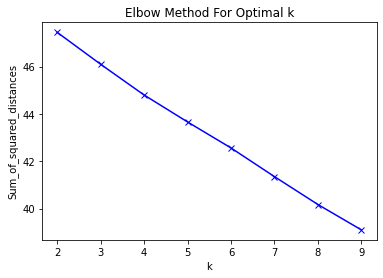

In [10]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The graph shows very slight deviations. So we choose term 5 arbitrarily for clustering

In [11]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=1)

Printing top terms at each cluster

In [12]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i)
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 machine
 learning
 unsupervised
 classification
 classify
 periodic
 confinement
 superstructure
 using
 missing
 imputation
 help
 value
 interpretable
 parameterization
 surface
 dimensional
 atmospheric
 wave
 active
Cluster 1:
 approach
 model
 turbulent
 application
 review
 data
 flow
 regression
 federated
 driven
 longitudinal
 car
 following
 learning
 using
 bayesian
 tutorial
 statistical
 inverse
 problem
Cluster 2:
 chatgpt
 science
 preliminary
 labor
 market
 study
 future
 enabled
 microscopy
 ocean
 biosignatures
 onboard
 life
 autonomy
 instrument
 surveyor
 high
 robust
 developing
 epidemic
Cluster 3:
 network
 deep
 learning
 criminal
 neural
 physic
 topological
 dynamical
 complex
 informed
 architecture
 bibliometric
 neuromorphic
 spiking
 distillation
 spectral
 parameterized
 correlation
 encoded
 vortex
Cluster 4:
 neural
 operator
 news
 using
 long
 sensor
 instruction
 visual
 tuning
 non
 molecular
 nonlocal
 approxima

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
lab = model.labels_
lab

array([4, 2, 4, 4, 2, 1, 1, 0, 4, 4, 3, 4, 2, 4, 3, 4, 3, 1, 1, 1, 3, 2,
       2, 4, 1, 4, 4, 0, 0, 3, 3, 3, 1, 0, 3, 3, 1, 0, 3, 0, 1, 3, 4, 4,
       4, 1, 3, 4, 4, 1, 3])

Hence the 51 sentences are clustered in 5 clusters.

In [14]:
df = pd.DataFrame(list(zip(document, lab)), columns = ['Sentence', 'Cluster'])
df

,Sentence,Cluster
0,A Method for Classifying Snow Using Ski-Mounte...,4
1,Developing Distributed High-performance Comput...,2
2,"Architecting Complex, Long-Lived Scientific So...",4
3,The Nonlocal Neural Operator: Universal Approx...,4
4,Onboard Science Instrument Autonomy for the De...,2
5,Reconstructing Turbulent Flows Using Physics-A...,1
6,"Fed-BioMed: Open, Transparent and Trusted Fede...",1
7,Missing Values and Imputation in Healthcare Da...,0
8,Profiling the news spreading barriers using ne...,4
9,Finding Bug-Inducing Program Environments,4


###### Displaying the clusters in wordmap

Cluster: 0


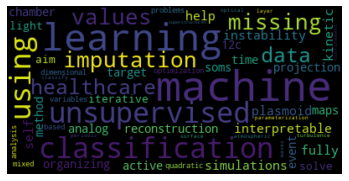

Cluster: 1


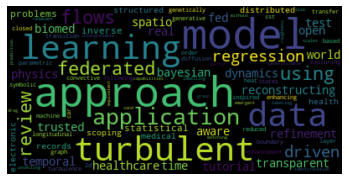

Cluster: 2


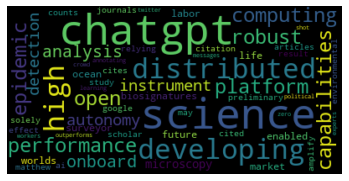

Cluster: 3


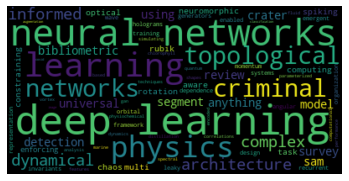

Cluster: 4


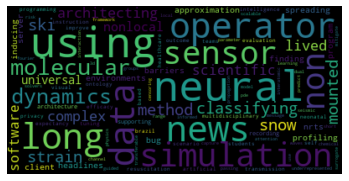

In [15]:
result={'cluster':lab,'doc':document}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['doc'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)
   print('Cluster: {}'.format(k))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()



#### Hence the sentences are clustered using tf-idf vectorization technique and k-means algorithm.

### Word2Vec Vectorization

##### Now clustering the sentences through word2vec vectorization technique and k-means algorithm.

gensim.utils.preprocess method of gensim can be used for removing stopwords, lemmatizig, and tokenizing.

In [16]:
d = []
for i in range(len(document)):
    doc = gensim.utils.simple_preprocess(document[i])
    doc = ' '.join(doc)
    d.append(doc)

In [17]:
d

['method for classifying snow using ski mounted strain sensors',
 'developing distributed high performance computing capabilities of an open science platform for robust epidemic analysis',
 'architecting complex long lived scientific software',
 'the nonlocal neural operator universal approximation',
 'onboard science instrument autonomy for the detection of microscopy biosignatures on the ocean worlds life surveyor',
 'reconstructing turbulent flows using physics aware spatio temporal dynamics and test time refinement',
 'fed biomed open transparent and trusted federated learning for real world healthcare applications',
 'missing values and imputation in healthcare data can interpretable machine learning help',
 'profiling the news spreading barriers using news headlines',
 'finding bug inducing program environments',
 'architectures of topological deep learning survey on topological neural networks',
 'nrts client server architecture for supporting data recording transmission and eva

In [18]:
model=Word2Vec(d, vector_size=50, min_count=2, sg=0)

#### Vectorizer function for the word2vec model

In [19]:
def vectorizer(s, m):
    features=[]
    for word in s:
        zero_vector = np.zeros(m.vector_size)
        vectors = []
        for w in word:
            if w in m.wv:
                vectors.append(m.wv[w])
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [20]:
v_d = vectorizer(d, model)
X= np.array(v_d)

In [21]:
X

array([[-0.20490947,  0.01985894, -0.00776413, ..., -0.16745327,
         0.1412738 , -0.09465192],
       [-0.2016383 ,  0.01959325, -0.00549406, ..., -0.16671768,
         0.14033048, -0.09221102],
       [-0.20046496,  0.01956705, -0.00473844, ..., -0.16370061,
         0.13754481, -0.09217753],
       ...,
       [-0.20024645,  0.02020124, -0.00748547, ..., -0.16510896,
         0.13709256, -0.09147651],
       [-0.20175858,  0.02001881, -0.00492522, ..., -0.16581362,
         0.1387602 , -0.09201702],
       [-0.2048131 ,  0.02233499, -0.00392538, ..., -0.16930568,
         0.13958189, -0.09169706]], dtype=float32)

In [22]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit_predict(X)

C:\Users\sundh\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 4, 1, 4, 4, 2, 2, 2, 2, 0, 1, 3, 0, 1, 4, 1, 2, 3, 2, 0, 0, 2,
       4, 1, 2, 2, 2, 4, 4, 1, 4, 0, 0, 4, 2, 0, 4, 2, 2, 4, 1, 0, 3, 3,
       3, 2, 4, 3, 1, 1, 4])

In [23]:
model.labels_

array([4, 4, 1, 4, 4, 2, 2, 2, 2, 0, 1, 3, 0, 1, 4, 1, 2, 3, 2, 0, 0, 2,
       4, 1, 2, 2, 2, 4, 4, 1, 4, 0, 0, 4, 2, 0, 4, 2, 2, 4, 1, 0, 3, 3,
       3, 2, 4, 3, 1, 1, 4])

In [24]:
lab = model.labels_

In [25]:
df = pd.DataFrame(list(zip(document, lab)), columns = ['Sentence', 'Cluster'])
df

,Sentence,Cluster
0,A Method for Classifying Snow Using Ski-Mounte...,4
1,Developing Distributed High-performance Comput...,4
2,"Architecting Complex, Long-Lived Scientific So...",1
3,The Nonlocal Neural Operator: Universal Approx...,4
4,Onboard Science Instrument Autonomy for the De...,4
5,Reconstructing Turbulent Flows Using Physics-A...,2
6,"Fed-BioMed: Open, Transparent and Trusted Fede...",2
7,Missing Values and Imputation in Healthcare Da...,2
8,Profiling the news spreading barriers using ne...,2
9,Finding Bug-Inducing Program Environments,0


##### Viewing the clusters in wordmap

Cluster: 0


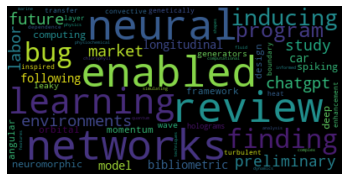

Cluster: 1


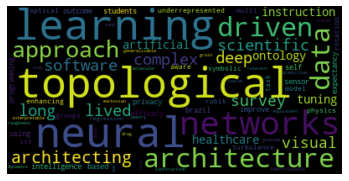

Cluster: 2


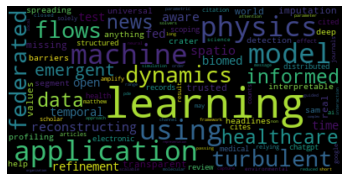

Cluster: 3


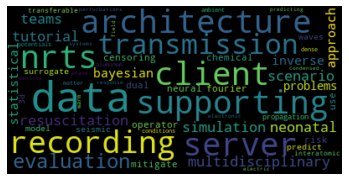

Cluster: 4


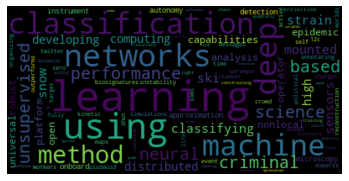

In [26]:
result={'cluster':lab,'doc':document}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['doc'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)
   print('Cluster: {}'.format(k))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()


#### Thus the sentences are clustered by vectorizing them via word2vec model and k-means algorithm